In [8]:
import numpy as np
rng = np.random.default_rng(seed=1701)

x = rng.integers(100, size=10)
print(x)

# 取得三個不同元素的方法 使用index
print([x[3], x[7], x[2]])

# 使用fancy index
int = [3, 7, 4]
print(x[int])

[90 40  9 30 80 67 39 15 33 79]
[np.int64(30), np.int64(15), np.int64(9)]
[30 15 80]


In [11]:
# 輸出結果形狀是根據索引陣列的形狀 而非原始被索引陣列的形狀
int = np.array([[3, 7],
                [4, 5]])
print(x[int])

X = np.arange(12).reshape((3,4))
print(X)

row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
print(X[row, col])

[[30 15]
 [80 67]]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[ 2  5 11]


In [13]:
print(X)

print(X[row[:, np.newaxis], col])

# 檢視擴張的運作方式
print(row[:, np.newaxis]* col)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 2  1  3]
 [ 6  5  7]
 [10  9 11]]
[[0 0 0]
 [2 1 3]
 [4 2 6]]


In [14]:
print(X)

# fancy index + index
print(X[2, [2, 0, 1]])

# fancy index + slice
print(X[1:, [2, 0, 1]])

# fancy index + mask
mask = np.array([True, False, True, False])
print(X[row[:, np.newaxis], mask])


[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[10  8  9]
[[ 6  4  5]
 [10  8  9]]
[[ 0  2]
 [ 4  6]
 [ 8 10]]


In [19]:
# N x D 陣列 代表 D維度上的N個點
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
x = rng.multivariate_normal(mean, cov, 100)
print(x.shape)

(100, 2)


In [24]:
# 依照維度去切 畫散點圖
print(x)
print(x[:,0], x[:,1])

[[ 1.19436543  2.60947136]
 [-1.0590735  -2.38345217]
 [ 0.53230837  1.85515115]
 [ 0.68417711  2.62815782]
 [-0.54737464 -1.35864691]
 [-0.84511219 -2.69499037]
 [-0.09358402 -1.27546009]
 [-0.06156909 -0.78606672]
 [ 1.67186082  3.83518681]
 [ 1.76271285  3.84864636]
 [-0.98763959 -2.86637675]
 [ 0.63047513  1.17647618]
 [ 1.08427121  2.79789319]
 [-0.69767116 -2.31465082]
 [ 0.93121741  2.58273374]
 [ 0.08636534 -0.07454642]
 [ 0.03933562 -0.65085374]
 [-0.85992472 -1.90278334]
 [ 0.83682548  1.26036743]
 [-0.33158504 -1.45170976]
 [-0.71301523 -1.12105444]
 [ 1.93403999  6.46744719]
 [-0.24601346  0.2438255 ]
 [ 0.17732924  0.09198089]
 [ 0.09427531  0.09865636]
 [ 1.03706808  1.62851757]
 [-1.09071394 -1.46482889]
 [-0.51130062 -0.12054538]
 [-0.38354896 -1.12450918]
 [ 0.33111974  1.35491628]
 [-1.06433567 -2.04633899]
 [ 1.11449236  1.59622014]
 [ 1.23465999  1.16341436]
 [ 1.33446475  2.0539531 ]
 [-0.33177341  0.75851693]
 [-0.20004599  0.45356925]
 [ 1.92795509  4.13660387]
 

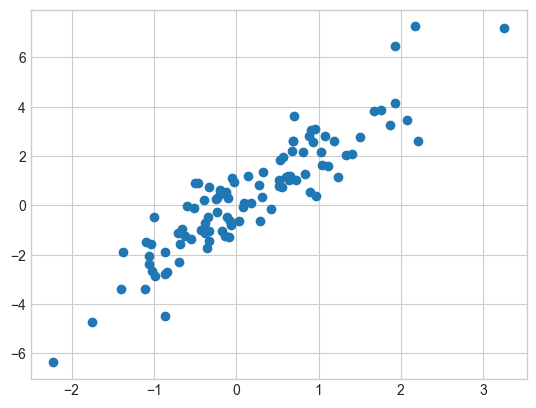

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

plt.scatter(x[:,0], x[:,1])

In [26]:
# 隨機取得20筆資料
indices = np.random.choice(x.shape[0], 20, replace=False)
print(indices)

selection = x[indices]
print(selection.shape)

[99 82 26  9 87 28 98 67 68 97 33 69 79 51 90 37 61 39 92 41]
(20, 2)


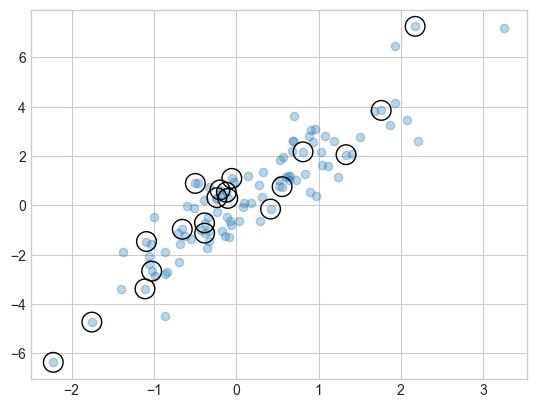

In [27]:
# 把選到的點 用較大的圓形疊到原本圖形上
# 可以用來進行統計模型的分割測試 或 快速分割資料集上
plt.scatter(x[:, 0], x[:, 1], alpha=0.3)
plt.scatter(selection[:,0], selection[:, 1],
            facecolor='none', edgecolor='black', s=200)

In [31]:
x = np.arange(10)
# 使用 Fancy index 修改值
i = np.array([2, 1, 8, 4])
print(x)
x[i] = 99
print(x)

# 也可以使用任一設定運算子執行
x[i] -= 10
print(x)


[0 1 2 3 4 5 6 7 8 9]
[ 0 99 99  3 99  5  6  7 99  9]
[ 0 89 89  3 89  5  6  7 89  9]


In [33]:
# 重複指定索引 後面指定的會蓋掉前面指定的資料
x = np.zeros(10)
x[[0,0]] = [4, 6]
print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [34]:
# 直觀的看法 會認為 x[3] 變成 2, x[4] 變成 3
# 但事實上 x[i] = x[i] + 1 可以理解成 直接全部都用一開始抓到的值去運算 而不是算完一個再算下一個
# 所以每一個都是單獨的 0+=1 最後一筆再蓋掉前面的
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
print(x)

[6. 0. 1. 1. 1. 0. 0. 0. 0. 0.]


In [35]:
# 如果真的要做類似遞迴的操作 要用.at(陣列, fancy 索引, count) (會在同一個位置進行前面的操作)
x = np.zeros(10)
np.add.at(x, i, 1)
print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


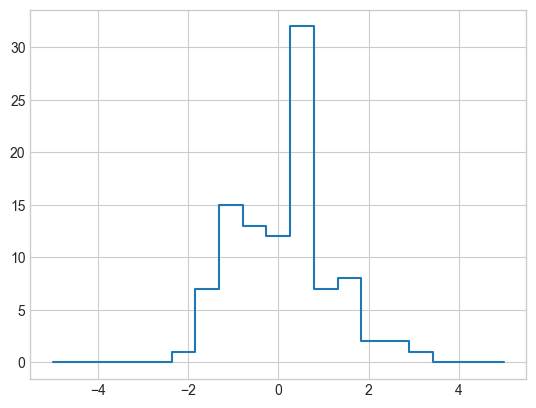

In [45]:
# 使用.at() 整理1000筆資料
rng = np.random.default_rng(seed=1701)
x = rng.normal(size=100)

# 手動計算直方圖
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

# 為每一個x找到適當的箱子
i = np.searchsorted(bins, x)

# 為每一個箱子加1
np.add.at(counts, i, 1)

plt.plot(bins, counts, drawstyle='steps')

(array([ 0.,  0.,  0.,  0.,  0.,  1.,  7., 15., 13., 12., 32.,  7.,  8.,
         2.,  2.,  1.,  0.,  0.,  0.]),
 array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
        -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
         0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
         2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ]),
 [<matplotlib.patches.Polygon at 0x1c7e4f1ee40>])

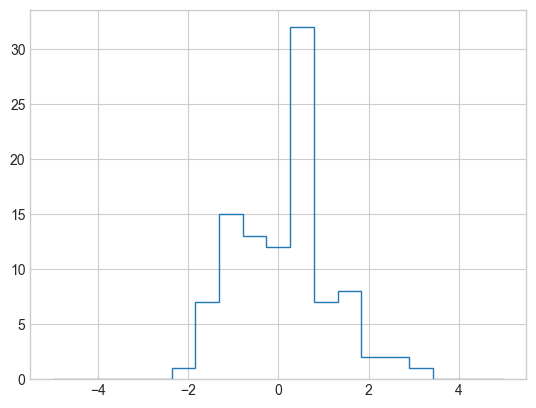

In [47]:
plt.hist(x, bins, histtype='step')